# Quick Start

The tutorial provides a quick start to the calzone package. Including the installation and the basic command line interface useage.

## Installation

calzone dependencies are numpy, scipy, statsmodels and matplotlib. If you are experienced developer, you probably already have numpy, scipy and matplolib installed. If you don't have a package install, you can install them with conda

In [ ]:
conda install numpy
conda install scipy
conda install matplotlib
conda install statsmodels

Alternatively, you can install the dependencies with pip

In [ ]:
pip install numpy
pip install scipy
pip install matplotlib 
pip install statsmodels

Then, you can process to install the calzone package from github if you only want to use the calculator inside you python script:

In [ ]:
pip install -e "git+https://github.com/DIDSR/OCS-Uncertainty-Quantification.git@develop#egg=calzone&subdirectory=calzone"

If you want to run the command line interface or GUI interface, you need to clone the github repository. Notice that the GUI interface require install nicegui using `pip install nicegui`.

In [ ]:
git clone https://github.com/DIDSR/OCS-Uncertainty-Quantification.git
cd OCS-Uncertainty-Quantification/
git checkout develop
cd calzone/
# install calzone
pip install -e .

## Command line interface 

First, you need to prepare your dataset in a specified format. The dataset should be a CSV file with the following columns:


proba_0, proba_1, ..., proba_n, label


where n >= 1.

Or if you have subgroups, the dataset should be a CSV file with the following columns:


proba_0, proba_1, ..., proba_n, subgroup_1, subgroup_2, ..., subgroup_m, label


where n >= 1 and m >= 1.


The program also works if your csv file has no header.It will assume the first [:-1] columns are the probabilities and the last column is the label.


In [2]:
### For illuration purpose , I will use build-in class to generate fake data. Do not run this cell in real case.
### A well-calibrated dataset and miscalibrated dataset are provided in the example folder
from calzone.utils import fake_binary_data_generator
import numpy as np
np.random.seed(123)
fakedata_generator = fake_binary_data_generator(alpha_val=0.5, beta_val=0.5)
X, y_true = fakedata_generator.generate_data(5000)
X2, y_true2 = fakedata_generator.generate_data(5000)
X2 = fakedata_generator.linear_miscal(X2, miscal_scale=2)
df = np.column_stack((np.array(X).tolist(), np.array(y_true).tolist()))
df_miscal = np.column_stack((np.array(X2).tolist(), np.array(y_true2).tolist()))
np.savetxt("../../../example_data/simulated_welldata.csv", df, delimiter=",",header="proba_0,proba_1,label", comments='')
np.savetxt("../../../example_data/simulated_misdata.csv", df_miscal, delimiter=",",header="proba_0,proba_1,label", comments='')


### Create data for subgroup analysis
import pandas as pd
# Create dataframes for each subgroup
df_A = pd.DataFrame({'proba_0': X[:, 0], 'proba_1': X[:, 1], 'subgroup': 'A', 'label': y_true})
df_B = pd.DataFrame({'proba_0': X2[:, 0], 'proba_1': X2[:, 1], 'subgroup': 'B', 'label': y_true2})

# Merge the dataframes
df_merged = pd.concat([df_A, df_B], ignore_index=True)

# Rename the 'subgroup' column to 'subgroup_1'
df_merged = df_merged.rename(columns={'subgroup': 'subgroup_1'})
df_merged.to_csv('../../../example_data/simulated_data_subgroup.csv', index=False)

To use CLI, you can use the script in the calzone directory. The program will save the metrics into the output csv file with the CI(if you turn on boostrap). The program will also save the relibaility diagram if you apply --plot flag. There is an optional flag --prevalence_adjustment which try to derive the original model prevalence and apply prevalence adjustment. See more on prevalence adjustment in the prevalecne adjustment notebook.

Metrics with bootstrap confidence intervals:
SpiegelhalterZ score: 0.3763269161877356 (-1.5807699880994444, 2.395927423238484)
SpiegelhalterZ p-value: 0.7066738713391099 (0.01657902492986192, 0.9714240967050577)
ECE-H topclass: 0.009608653731328977 (0.006237296592901701, 0.021363377084910293)
ECE-H: 0.01208775955804901 (0.010662158686019193, 0.02511708040454675)
MCE-H topclass: 0.03926468843081976 (0.016489481574476408, 0.0763983896743262)
MCE-H: 0.04848338618970194 (0.034247525285896856, 0.1074403870211145)
HL-H score: 8.884991559088098 (7.391861851849875, 34.05795071824684)
HL-H p-value: 0.35209071874348785 (3.9657229660833296e-05, 0.49500303134624424)
ECE-C topclass: 0.009458033653818828 (0.00721331682837393, 0.020941041355055263)
ECE-C: 0.008733966945443138 (0.007839328136793722, 0.021823858875608868)
MCE-C topclass: 0.020515047600205505 (0.018278548269587185, 0.072061934281328)
MCE-C: 0.02324031223486256 (0.02026915149707693, 0.07130018652739761)
HL-C score: 3.694947603203135 (4.7

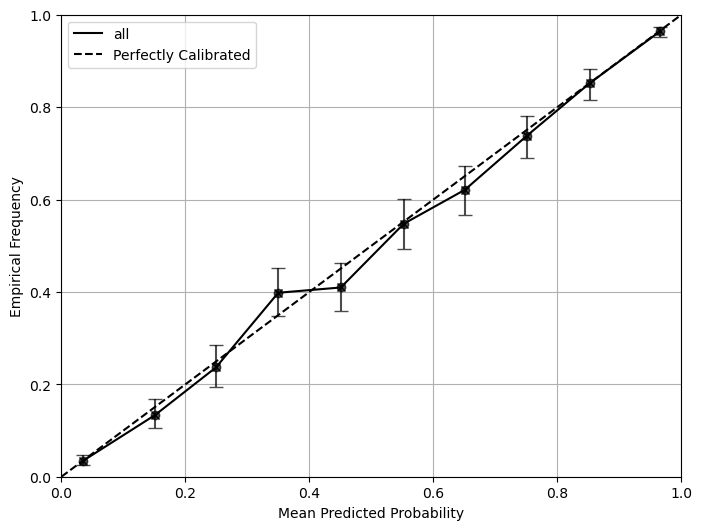

In [3]:
%run ../../../cal_metrics.py \
--csv_file '../../../example_data/simulated_welldata.csv' \
--metrics all \
--n_bootstrap 1000 \
--bootstrap_ci 0.95 \
--class_to_calculate 1 \
--num_bins 10 \
--save_metrics '../../../example_data/simulated_welldata_result.csv' \
--plot \
--plot_bins 10 \
--save_plot '../../../example_data/simulated_welldata_result.png' \
--verbose \
--save_diagram_output '../../../example_data/simulated_welldata_diagram_output.csv' 
### save_diagram_output only when you want to save the reliability diagram output
#--prevalence_adjustment # only when you want to apply prevalence adjustment

We can also test it on a miscalibrated dataset

Metrics with bootstrap confidence intervals:
SpiegelhalterZ score: 27.93575342117766 (24.839219624348278, 30.96864965466825)
SpiegelhalterZ p-value: 0.0 (0.0, 0.0)
ECE-H topclass: 0.07658928982434714 (0.06804004301206772, 0.08592504653855504)
ECE-H: 0.0765892898243467 (0.06908364720616232, 0.08706668363498338)
MCE-H topclass: 0.1327565894838103 (0.1072993386569483, 0.17370691765648233)
MCE-H: 0.16250572519432438 (0.12906539767215233, 0.2321783714888279)
HL-H score: 910.4385762101924 (716.4295175706912, 1150.8612337604823)
HL-H p-value: 0.0 (0.0, 0.0)
ECE-C topclass: 0.07429481165606829 (0.06631382877661166, 0.08385320903282655)
ECE-C: 0.07479369479609524 (0.06521419240394898, 0.08451549201546268)
MCE-C topclass: 0.14090872416947742 (0.1269495376864691, 0.1823624107494838)
MCE-C: 0.14045600565696226 (0.11794558748818013, 0.18126150855551718)
HL-C score: 2246.1714434139853 (1438.8321063523322, 3877.6343314327746)
HL-C p-value: 0.0 (0.0, 0.0)
COX coef: 0.5071793536874274 (0.48019087097996

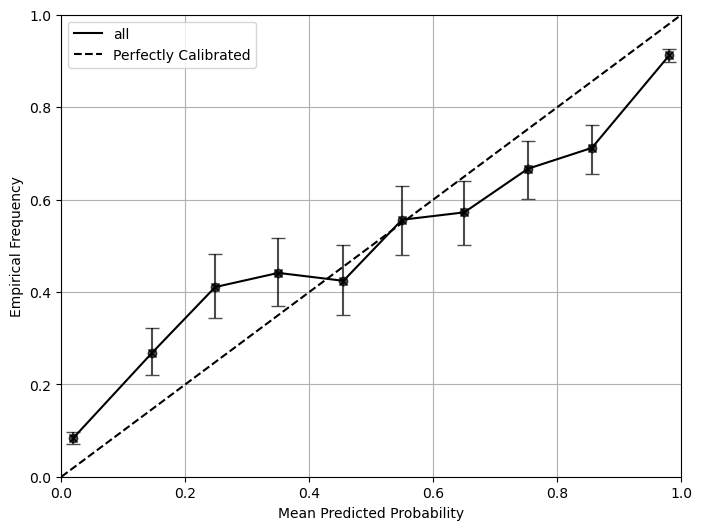

In [4]:
%run ../../../cal_metrics.py \
--csv_file '../../../example_data/simulated_misdata.csv' \
--metrics all \
--n_bootstrap 1000 \
--bootstrap_ci 0.95 \
--class_to_calculate 1 \
--num_bins 10 \
--save_metrics '../../../example_data/simulated_misdata_result.csv' \
--plot \
--plot_bins 10 \
--save_plot '../../../example_data/simulated_misdata_result.png' \
--verbose

If your data has subgroup in it, simply run the script with the same argument as the one above. It will automatically detect the subgroup and generate the corresponding plots and metrics for each subgroup as well as the overall plot and metrics.

Metrics with bootstrap confidence intervals:
SpiegelhalterZ score: 18.326500460344757 (15.794425720424307, 21.009071137218545)
SpiegelhalterZ p-value: 0.0 (0.0, 0.0)
ECE-H topclass: 0.04154425366233608 (0.035162680250315326, 0.0487781595899893)
ECE-H: 0.041606274177861564 (0.03626017371676395, 0.04928029387732635)
MCE-H topclass: 0.05506859806121056 (0.04331485568122394, 0.0869230686941801)
MCE-H: 0.06291857721845223 (0.055158065643750864, 0.1088686317831368)
HL-H score: 429.7315889789045 (335.11578816644203, 584.729042436792)
HL-H p-value: 0.0 (0.0, 0.0)
ECE-C topclass: 0.04153827551437989 (0.0350890066069272, 0.04856089519450712)
ECE-C: 0.03813373547517625 (0.032491644045163894, 0.045650280882645645)
MCE-C topclass: 0.06521747269553313 (0.05538089768555629, 0.09135243436267283)
MCE-C: 0.06426881466822676 (0.0524336589658407, 0.08557007576047433)
HL-C score: 1138.8421218049589 (779.57729419585, 1844.1495866997284)
HL-C p-value: 0.0 (0.0, 0.0)
COX coef: 0.6682652785932737 (0.6376363393

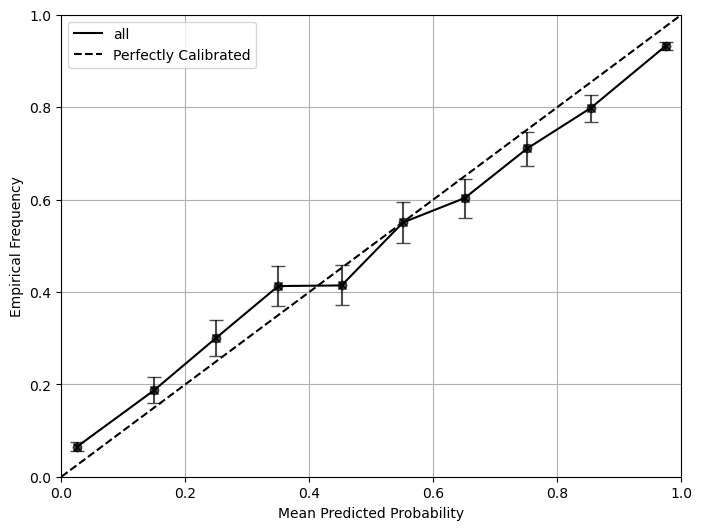

Metrics for subgroup_subgroup_1_group_A with bootstrap confidence intervals:
SpiegelhalterZ score: 0.3763269161877356 (-1.5359800860884125, 2.2488155422979013)
SpiegelhalterZ p-value: 0.7066738713391099 (0.017995824692690548, 0.9811170221289532)
ECE-H topclass: 0.009608653731328977 (0.006371686227273764, 0.020742746570495938)
ECE-H: 0.01208775955804901 (0.011044543089461385, 0.024940242096806318)
MCE-H topclass: 0.03926468843081976 (0.017372239183410455, 0.07700143962593547)
MCE-H: 0.04848338618970194 (0.03372598502185041, 0.1071291778699107)
HL-H score: 8.884991559088098 (7.273487544511223, 34.59989369427734)
HL-H p-value: 0.35209071874348785 (3.163091828276566e-05, 0.5074334636323794)
ECE-C topclass: 0.009458033653818828 (0.006979976658399776, 0.021851164000168777)
ECE-C: 0.008733966945443138 (0.007430067110742732, 0.022551490154444104)
MCE-C topclass: 0.020515047600205505 (0.018219924040503894, 0.07211048818162254)
MCE-C: 0.02324031223486256 (0.01836219827883755, 0.07494846883030193

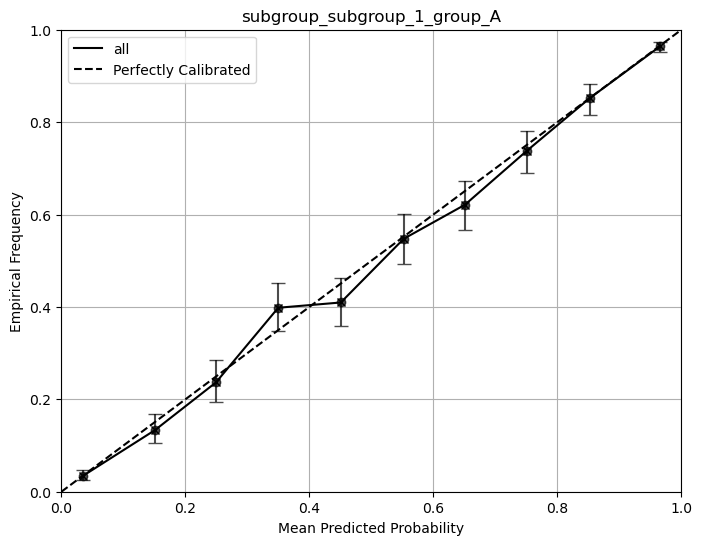

Metrics for subgroup_subgroup_1_group_B with bootstrap confidence intervals:
SpiegelhalterZ score: 27.93575342117766 (24.631422604718676, 31.175300518712312)
SpiegelhalterZ p-value: 0.0 (0.0, 0.0)
ECE-H topclass: 0.07658928982434714 (0.06765650178979271, 0.08636225848567715)
ECE-H: 0.0765892898243467 (0.06852580643902269, 0.08669733313597802)
MCE-H topclass: 0.1327565894838103 (0.10843309437791786, 0.17516961720016064)
MCE-H: 0.16250572519432438 (0.1295497608714206, 0.23249785199476106)
HL-H score: 910.4385762101924 (716.6807269435134, 1156.9707806779575)
HL-H p-value: 0.0 (0.0, 0.0)
ECE-C topclass: 0.07429481165606829 (0.0659985856593326, 0.08416749740577707)
ECE-C: 0.07479369479609524 (0.06521943504742775, 0.08470642937718316)
MCE-C topclass: 0.14090872416947742 (0.12372092623207283, 0.18193866660299501)
MCE-C: 0.14045600565696226 (0.11493943681645637, 0.18157672352633192)
HL-C score: 2246.1714434139853 (1393.1748036207835, 3900.3906228529886)
HL-C p-value: 0.0 (0.0, 0.0)
COX coef: 0

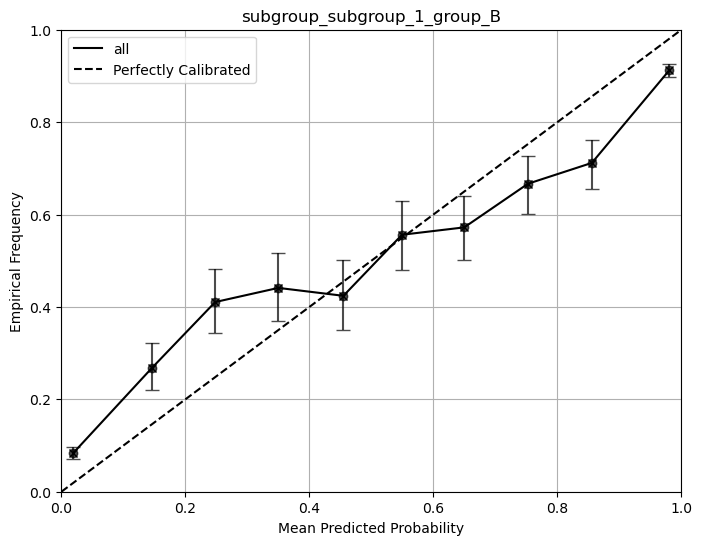

In [5]:
%run ../../../cal_metrics.py \
--csv_file '../../../example_data/simulated_data_subgroup.csv' \
--metrics all \
--n_bootstrap 1000 \
--bootstrap_ci 0.95 \
--class_to_calculate 1 \
--num_bins 10 \
--save_metrics '../../../example_data/simulated_data_subgroup_result.csv' \
--plot \
--plot_bins 10 \
--save_plot '../../../example_data/simulated_data_subgroup_result.png' \
--verbose